In [266]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 
import matplotlib

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go
import sklearn.metrics as metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix, classification_report

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic-ethnicolr/test_df1.csv
/kaggle/input/titanic-ethnicolr/train_df1.csv
/kaggle/input/ethnicolr/test_df1.csv
/kaggle/input/ethnicolr/train_df1.csv


In [267]:
train_df = pd.read_csv("/kaggle/input/ethnicolr/train_df1.csv")
test_df = pd.read_csv("/kaggle/input/ethnicolr/test_df1.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname,fname,race,"Asian,GreaterEastAsian,EastAsian","Asian,GreaterEastAsian,Japanese","Asian,IndianSubContinent","GreaterAfrican,Africans","GreaterAfrican,Muslim","GreaterEuropean,British","GreaterEuropean,EastEuropean","GreaterEuropean,Jewish","GreaterEuropean,WestEuropean,French","GreaterEuropean,WestEuropean,Germanic","GreaterEuropean,WestEuropean,Hispanic","GreaterEuropean,WestEuropean,Italian","GreaterEuropean,WestEuropean,Nordic"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen,"GreaterEuropean,British",0.007827,0.007468,0.002911,0.005087,0.002146,0.870854,0.001782,0.024019,0.004581,0.003198,0.011284,0.022251,0.036592
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John,"GreaterEuropean,British",0.006280,0.000999,0.002050,0.000627,0.000123,0.961237,0.000404,0.004587,0.016936,0.001103,0.002676,0.002137,0.000841
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,"GreaterEuropean,Jewish",0.001866,0.015157,0.008656,0.007041,0.026776,0.064438,0.175198,0.354154,0.055253,0.110685,0.041787,0.026116,0.112873
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques,"GreaterEuropean,WestEuropean,French",0.000268,0.000138,0.000797,0.001250,0.000163,0.011096,0.000420,0.005637,0.963607,0.001095,0.003131,0.012179,0.000219
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William,"GreaterEuropean,British",0.004326,0.002418,0.001982,0.002633,0.000349,0.921722,0.000792,0.022355,0.026930,0.002508,0.005986,0.006512,0.001489


In [269]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Asian,GreaterEastAsian,EastAsian","Asian,GreaterEastAsian,Japanese","Asian,IndianSubContinent","GreaterAfrican,Africans","GreaterAfrican,Muslim","GreaterEuropean,British","GreaterEuropean,EastEuropean","GreaterEuropean,Jewish","GreaterEuropean,WestEuropean,French","GreaterEuropean,WestEuropean,Germanic","GreaterEuropean,WestEuropean,Hispanic","GreaterEuropean,WestEuropean,Italian","GreaterEuropean,WestEuropean,Nordic"
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.013719,0.008180,0.019933,0.017851,0.030214,0.494490,0.045303,0.090071,0.065708,0.044760,0.039177,0.037809,0.092785
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.079975,0.039369,0.057897,0.049527,0.109077,0.378219,0.132675,0.143860,0.139760,0.105596,0.100073,0.108390,0.230923
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000010,0.000056,0.000001,0.000002,0.000001,0.000208,0.000012,0.000011,0.000010,0.000050,0.000021,0.000013,0.000002
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.002057,0.001402,0.002440,0.002262,0.000666,0.079186,0.001366,0.015795,0.010673,0.002588,0.005744,0.004532,0.001926
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.004363,0.002707,0.004896,0.004436,0.002100,0.555708,0.004987,0.037035,0.022149,0.007131,0.010823,0.009356,0.006365
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.008139,0.005766,0.010254,0.009988,0.007886,0.886763,0.019703,0.089512,0.048626,0.028910,0.024134,0.022717,0.030330
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.996605,0.980327,0.584214,0.632696,0.847636,0.974375,0.954580,0.928004,0.965396,0.929990,0.935754,0.995330,0.999412


In [270]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'lname', 'fname',
       'race', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic'],
      dtype='object')

In [304]:
ethnicities = train_df['race'].unique()
ethnicities

array(['GreaterEuropean,British', 'GreaterEuropean,Jewish',
       'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Nordic',
       'GreaterEuropean,WestEuropean,Germanic', 'GreaterAfrican,Muslim',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,EastEuropean', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese'], dtype=object)

# EDA on ethnicity and survival rates

## This is a work in progress :)



### NOTE: Passenger race/ethnicity has been probabalistically determined from their names using the ethnicolr library. The accuracy has not been verified at this time. As such the EDA should be taken with a grain of salt for now.

In [303]:
# Begin exploration by checking survival rates by race/ ethnicity and the sample size

for i in ethnicities:
    pop_mean = round(train_df['Survived'].loc[train_df['race'] == i].mean(),2)
    pop_count = train_df['Survived'].loc[train_df['race'] == i].count()
    print(str(i+":"), 'Survival Rate =', pop_mean, ', Sample Size =', pop_count)

GreaterEuropean,British: Survival Rate = 0.43 , Sample Size = 512
GreaterEuropean,Jewish: Survival Rate = 0.46 , Sample Size = 57
GreaterEuropean,WestEuropean,French: Survival Rate = 0.47 , Sample Size = 45
GreaterEuropean,WestEuropean,Nordic: Survival Rate = 0.19 , Sample Size = 89
GreaterEuropean,WestEuropean,Germanic: Survival Rate = 0.23 , Sample Size = 35
GreaterAfrican,Muslim: Survival Rate = 0.41 , Sample Size = 29
GreaterEuropean,WestEuropean,Italian: Survival Rate = 0.39 , Sample Size = 28
GreaterEuropean,WestEuropean,Hispanic: Survival Rate = 0.29 , Sample Size = 21
GreaterEuropean,EastEuropean: Survival Rate = 0.23 , Sample Size = 43
Asian,IndianSubContinent: Survival Rate = 0.21 , Sample Size = 14
GreaterAfrican,Africans: Survival Rate = 0.5 , Sample Size = 8
Asian,GreaterEastAsian,EastAsian: Survival Rate = 0.67 , Sample Size = 6
Asian,GreaterEastAsian,Japanese: Survival Rate = 0.25 , Sample Size = 4


### This is very preliminary, but does appear to indicate differences in the survival rates of different races/ethnicities. 

#### - The majority of passengers appear to have been British. This of course should be expected, as the Titanic set sail from Britain.
#### - Cultural divides appear to have caused differences even within races. Many people would consider all Europeans to be White, yet there appear to be differences in survival rates within the sub-categories of White Europeans.
#### - Building on the above, the Titanic sank a couple years prior to World War I. It was a British ship, and it does appear that survival odds may have favoured the British and their allies at the expense of their soon to be enemies in the war.
#### - There are races/ethnicities (such as the two asian categories) with such small sample populations that it will be difficult to gain statitistically significant insight into how their race/ethnicity affected their chances of survival.
#### - Ceteris Paribus: At a later time, I will do further analysis to control for the effects of other socioeconomic variables on survival rates.
#### - It may be useful for the purposes of model building to combine some categories. 


In [203]:
train_df.dtypes

PassengerId                                int64
Survived                                   int64
Pclass                                     int64
Name                                      object
Sex                                       object
Age                                      float64
SibSp                                      int64
Parch                                      int64
Ticket                                    object
Fare                                     float64
Cabin                                     object
Embarked                                  object
lname                                     object
fname                                     object
race                                      object
Asian,GreaterEastAsian,EastAsian         float64
Asian,GreaterEastAsian,Japanese          float64
Asian,IndianSubContinent                 float64
GreaterAfrican,Africans                  float64
GreaterAfrican,Muslim                    float64
GreaterEuropean,Brit

In [204]:
train_df.isna().sum()

PassengerId                                0
Survived                                   0
Pclass                                     0
Name                                       0
Sex                                        0
Age                                      177
SibSp                                      0
Parch                                      0
Ticket                                     0
Fare                                       0
Cabin                                    687
Embarked                                   2
lname                                      0
fname                                      0
race                                       0
Asian,GreaterEastAsian,EastAsian           0
Asian,GreaterEastAsian,Japanese            0
Asian,IndianSubContinent                   0
GreaterAfrican,Africans                    0
GreaterAfrican,Muslim                      0
GreaterEuropean,British                    0
GreaterEuropean,EastEuropean               0
GreaterEur

In [205]:
train_df.nunique()

PassengerId                              891
Survived                                   2
Pclass                                     3
Name                                     891
Sex                                        2
Age                                       88
SibSp                                      7
Parch                                      7
Ticket                                   681
Fare                                     248
Cabin                                    147
Embarked                                   3
lname                                    661
fname                                    435
race                                      13
Asian,GreaterEastAsian,EastAsian         840
Asian,GreaterEastAsian,Japanese          842
Asian,IndianSubContinent                 838
GreaterAfrican,Africans                  842
GreaterAfrican,Muslim                    839
GreaterEuropean,British                  838
GreaterEuropean,EastEuropean             838
GreaterEur

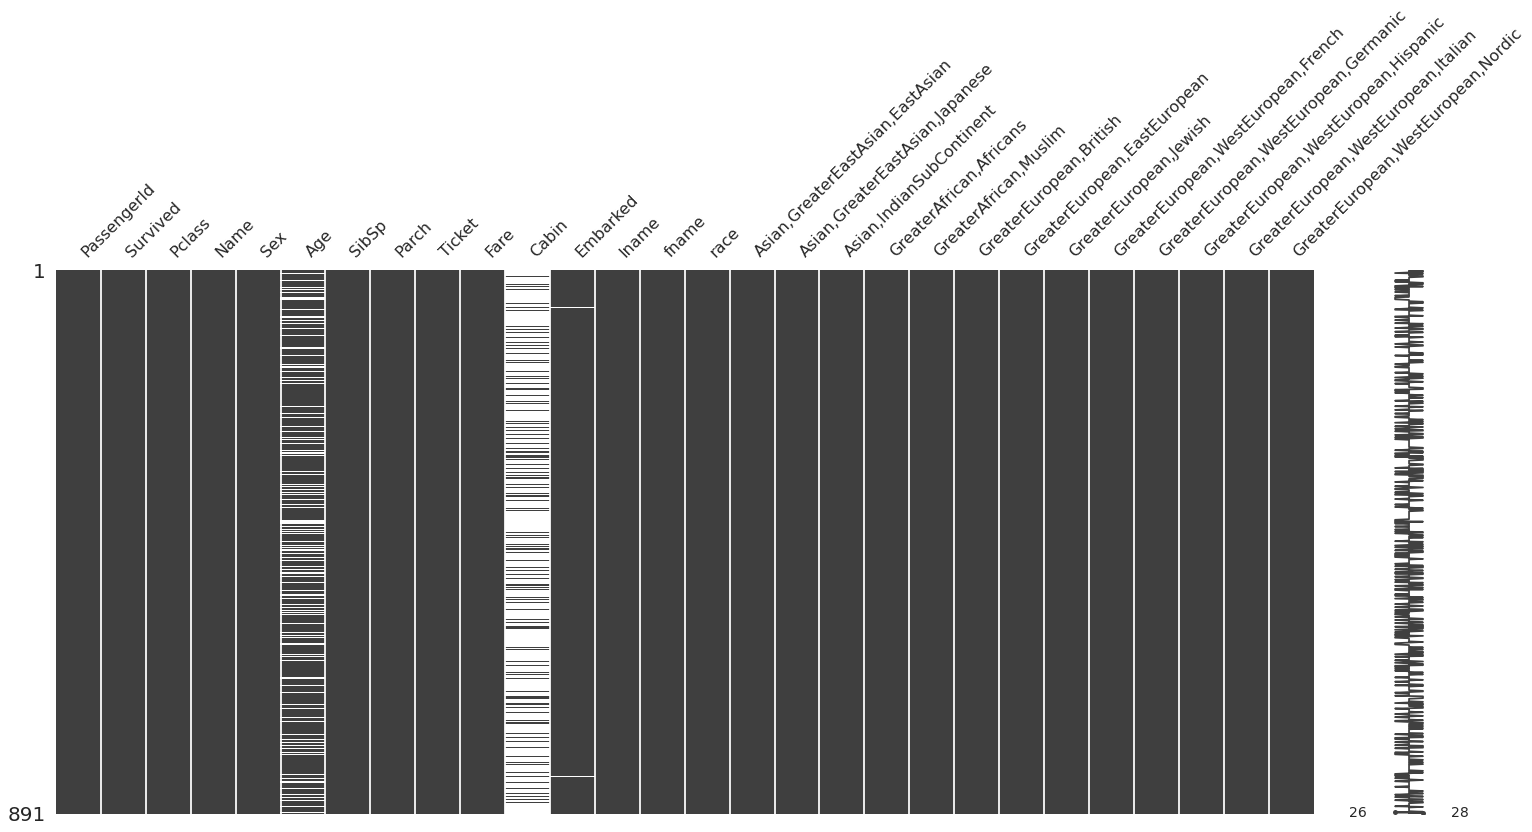

In [206]:
# visualize NaN's

msno.matrix(train_df)

# Explore Features

In [207]:
#profile = pandas_profiling.ProfileReport(train_df)

In [208]:
#profile

# Feature Engineering

In [209]:
train_df = train_df.drop(['fname'], axis=1)
train_df = train_df.drop(['lname'], axis=1)
test_df = test_df.drop(['fname'], axis=1)
test_df = test_df.drop(['lname'], axis=1)

In [210]:
# Create new features: 'relatives' & 'travelled alone'

data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'
    
train_df['travelled_alone'].value_counts()

Yes    537
No     354
Name: travelled_alone, dtype: int64

In [211]:
# Drop 'PassengerId', because it does not affect survival probability

train_df = train_df.drop(['PassengerId'], axis=1)

In [212]:
# Engineer new feature, 'Deck', from 'Cabin'

import re
deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna("U")

# Drop cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)



In [213]:
# Fill NaN values in 'Age' with random values generated using mean and std dev

data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [214]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [215]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [216]:
train_df['Fare'] = train_df['Fare'].astype(int)

In [217]:
test_df['Fare'] = test_df['Fare'].astype(int)

In [218]:
# Begin the process of extracting titles

train_titles = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
type(train_titles)

pandas.core.series.Series

In [219]:
# Inspect value counts for title

train_titles.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Jonkheer      1
Capt          1
Don           1
Lady          1
Ms            1
Countess      1
Mme           1
Name: Name, dtype: int64

In [220]:
# Engineer new feature 'title'

data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
   # dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna("NA")

In [221]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [222]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [223]:
# Engineer new feature, 'Age_Class'

data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']



In [224]:
# Engineer new feature, "Fare_Per_Person"

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [225]:
# Assign 'Age' to categories

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    
    dataset['Age'] = dataset['Age'].astype(str)
    dataset.loc[ dataset['Age'] == '0', 'Age'] = "Children"
    dataset.loc[ dataset['Age'] == '1', 'Age'] = "Teens"
    dataset.loc[ dataset['Age'] == '2', 'Age'] = "Youngsters"
    dataset.loc[ dataset['Age'] == '3', 'Age'] = "Young Adults"
    dataset.loc[ dataset['Age'] == '4', 'Age'] = "Adults"
    dataset.loc[ dataset['Age'] == '5', 'Age'] = "Middle Age"
    dataset.loc[ dataset['Age'] == '6', 'Age'] = "Senior"
    dataset.loc[ dataset['Age'] == '7', 'Age'] = "Retired"

# inspect how age is distributed
train_df['Age'].value_counts()

Adults          166
Senior          154
Middle Age      137
Young Adults    131
Youngsters      130
Teens            98
Children         68
Retired           7
Name: Age, dtype: int64

In [226]:
# Assign 'Fare' to categories

data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset['Fare'] = dataset['Fare'].astype(str)
    dataset.loc[ dataset['Fare'] == '0', 'Fare'] = "Extremely Low"
    dataset.loc[ dataset['Fare'] == '1', 'Fare'] = "Very Low"
    dataset.loc[ dataset['Fare'] == '2', 'Fare'] = "Low"
    dataset.loc[ dataset['Fare'] == '3', 'Fare'] = "High"
    dataset.loc[ dataset['Fare'] == '4', 'Fare'] = "Very High"
    dataset.loc[ dataset['Fare'] == '5', 'Fare'] = "Extremely High"

In [227]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Survived                               891 non-null    int64  
 1   Pclass                                 891 non-null    int64  
 2   Sex                                    891 non-null    object 
 3   Age                                    891 non-null    object 
 4   SibSp                                  891 non-null    int64  
 5   Parch                                  891 non-null    int64  
 6   Fare                                   891 non-null    object 
 7   Embarked                               891 non-null    object 
 8   race                                   891 non-null    object 
 9   Asian,GreaterEastAsian,EastAsian       891 non-null    float64
 10  Asian,GreaterEastAsian,Japanese        891 non-null    float64
 11  Asian,

In [228]:
data = [train_df, test_df]

for dataset in data:
    dataset['Pclass'] = dataset['Pclass'].astype(str)
    dataset.loc[ dataset['Pclass'] == '1', 'Pclass'] = "Class1"
    dataset.loc[ dataset['Pclass'] == '2', 'Pclass'] = "Class2"
    dataset.loc[ dataset['Pclass'] == '3', 'Pclass'] = "Class3"

In [229]:
# Capture all the numerical features so they can be scaled

train_numerical_features = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_numerical_features

['Survived',
 'SibSp',
 'Parch',
 'Asian,GreaterEastAsian,EastAsian',
 'Asian,GreaterEastAsian,Japanese',
 'Asian,IndianSubContinent',
 'GreaterAfrican,Africans',
 'GreaterAfrican,Muslim',
 'GreaterEuropean,British',
 'GreaterEuropean,EastEuropean',
 'GreaterEuropean,Jewish',
 'GreaterEuropean,WestEuropean,French',
 'GreaterEuropean,WestEuropean,Germanic',
 'GreaterEuropean,WestEuropean,Hispanic',
 'GreaterEuropean,WestEuropean,Italian',
 'GreaterEuropean,WestEuropean,Nordic',
 'relatives',
 'Age_Class',
 'Fare_Per_Person']

In [230]:
# used to avoid scaling of ethnicolr features

#train_numerical_features = ['Survived',
# 'SibSp',
# 'Parch',
# 'relatives',
# 'Age_Class',
# 'Fare_Per_Person']

In [231]:
del train_numerical_features[0]
train_numerical_features

['SibSp',
 'Parch',
 'Asian,GreaterEastAsian,EastAsian',
 'Asian,GreaterEastAsian,Japanese',
 'Asian,IndianSubContinent',
 'GreaterAfrican,Africans',
 'GreaterAfrican,Muslim',
 'GreaterEuropean,British',
 'GreaterEuropean,EastEuropean',
 'GreaterEuropean,Jewish',
 'GreaterEuropean,WestEuropean,French',
 'GreaterEuropean,WestEuropean,Germanic',
 'GreaterEuropean,WestEuropean,Hispanic',
 'GreaterEuropean,WestEuropean,Italian',
 'GreaterEuropean,WestEuropean,Nordic',
 'relatives',
 'Age_Class',
 'Fare_Per_Person']

In [232]:
# Feature scaling
ss_scaler = StandardScaler()
train_df_ss = pd.DataFrame(data = train_df)
train_df_ss[train_numerical_features] = ss_scaler.fit_transform(train_df_ss[train_numerical_features])

In [233]:
test_numerical_features = list(test_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['PassengerId',
 'SibSp',
 'Parch',
 'Asian,GreaterEastAsian,EastAsian',
 'Asian,GreaterEastAsian,Japanese',
 'Asian,IndianSubContinent',
 'GreaterAfrican,Africans',
 'GreaterAfrican,Muslim',
 'GreaterEuropean,British',
 'GreaterEuropean,EastEuropean',
 'GreaterEuropean,Jewish',
 'GreaterEuropean,WestEuropean,French',
 'GreaterEuropean,WestEuropean,Germanic',
 'GreaterEuropean,WestEuropean,Hispanic',
 'GreaterEuropean,WestEuropean,Italian',
 'GreaterEuropean,WestEuropean,Nordic',
 'relatives',
 'Age_Class',
 'Fare_Per_Person']

In [234]:
# used to avoid scaling of ethnicolr features

#test_numerical_features = ['Survived',
# 'SibSp',
# 'Parch',
# 'relatives',
# 'Age_Class',
# 'Fare_Per_Person']

In [235]:
del test_numerical_features[0]
test_numerical_features

['SibSp',
 'Parch',
 'Asian,GreaterEastAsian,EastAsian',
 'Asian,GreaterEastAsian,Japanese',
 'Asian,IndianSubContinent',
 'GreaterAfrican,Africans',
 'GreaterAfrican,Muslim',
 'GreaterEuropean,British',
 'GreaterEuropean,EastEuropean',
 'GreaterEuropean,Jewish',
 'GreaterEuropean,WestEuropean,French',
 'GreaterEuropean,WestEuropean,Germanic',
 'GreaterEuropean,WestEuropean,Hispanic',
 'GreaterEuropean,WestEuropean,Italian',
 'GreaterEuropean,WestEuropean,Nordic',
 'relatives',
 'Age_Class',
 'Fare_Per_Person']

In [236]:
# Feature scaling

test_ss_scaler = StandardScaler()
test_df_ss = pd.DataFrame(data = test_df)
test_df_ss[test_numerical_features] = test_ss_scaler.fit_transform(test_df_ss[test_numerical_features])

In [237]:
# One-Hot encoding

encode_col_list = list(train_df.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_df_ss = pd.concat([train_df_ss,pd.get_dummies(train_df_ss[i], prefix=i)],axis=1)
    train_df_ss.drop(i, axis = 1, inplace=True)

In [238]:
# One-Hot encoding

test_encode_col_list = list(test_df.select_dtypes(include=['object']).columns)
for i in test_encode_col_list:
    test_df_ss = pd.concat([test_df_ss,pd.get_dummies(test_df_ss[i], prefix=i)],axis=1)
    test_df_ss.drop(i, axis = 1, inplace=True)

In [239]:
X_train = train_df_ss.drop("Survived", axis=1)
y_train = train_df_ss["Survived"]
X_test  = test_df_ss.drop("PassengerId", axis=1).copy()

In [240]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [241]:
X_train.columns

Index(['SibSp', 'Parch', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic', 'relatives', 'Age_Class',
       'Fare_Per_Person', 'Pclass_Class1', 'Pclass_Class2', 'Pclass_Class3',
       'Sex_female', 'Sex_male', 'Age_Adults', 'Age_Children',
       'Age_Middle Age', 'Age_Retired', 'Age_Senior', 'Age_Teens',
       'Age_Young Adults', 'Age_Youngsters', 'Fare_Extremely High',
       'Fare_Extremely Low', 'Fare_High', 'Fare_Low', 'Fare_Very High',
       'Fare_Very Low', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'race_Asian,GreaterEastAsian,EastAsia

# Feature Selection

In [242]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [243]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

xgb = RandomForestClassifier( max_depth = 8, class_weight = 'balanced', 
   random_state = 42)

#xgb =  XGBClassifier(objective = 'binary:logistic',
#                   booster= 'gbtree', 
#                    learning_rate = 0.0001, 
#                    random_state = 42)#

In [244]:
feature_names = ['SibSp', 'Parch', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic', 'relatives', 'Age_Class',
       'Fare_Per_Person', 'Pclass_Class1', 'Pclass_Class2', 'Pclass_Class3',
       'Sex_female', 'Sex_male', 'Age_Adults', 'Age_Children',
       'Age_Middle Age', 'Age_Retired', 'Age_Senior', 'Age_Teens',
       'Age_Young Adults', 'Age_Youngsters', 'Fare_Extremely High',
       'Fare_Extremely Low', 'Fare_High', 'Fare_Low', 'Fare_Very High',
       'Fare_Very Low', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'travelled_alone_No',
       'travelled_alone_Yes', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_U', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare']

feature_names = ['SibSp', 'Parch', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic', 'relatives', 'Age_Class',
       'Fare_Per_Person','Pclass_Class2', 'Pclass_Class3',
       'Sex_female',   'Fare_Extremely High',
       'Fare_Extremely Low', 'Fare_High', 'Fare_Low', 'Fare_Very High',
       'Fare_Very Low', 
        'travelled_alone_No',
       'travelled_alone_Yes', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_U', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare']

In [245]:
from boruta import BorutaPy

boruta_selector = BorutaPy(xgb, n_estimators = 'auto', random_state = 42)
boruta_selector.fit(np.array(X_train[feature_names]), np.array(y_train))

boruta_ranking = boruta_selector.ranking_
selected_features = np.array(feature_names)[boruta_ranking <= 16]

In [246]:
boruta_ranking = pd.DataFrame(data=boruta_ranking, index=X_train[feature_names].columns.values, columns=['values'])
boruta_ranking['Variable'] = boruta_ranking.index
boruta_ranking.sort_values(['values'], ascending=True, inplace=True)

selected_features


array(['SibSp', 'Parch', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic', 'relatives', 'Age_Class',
       'Fare_Per_Person', 'Pclass_Class1', 'Pclass_Class3', 'Sex_female',
       'Sex_male', 'Fare_Extremely Low', 'travelled_alone_Yes', 'Deck_U',
       'Title_Miss', 'Title_Mr', 'Title_Mrs'], dtype='<U37')

# from prior notebook

selected_features = ['SibSp', 'Parch', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic', 'relatives',
                     'Age_Class',
       'Fare_Per_Person', 'Pclass_Class1', 'Pclass_Class2',
       'Pclass_Class3', 'Sex_female', 'Age_Children',
       'Fare_Extremely Low', 'Fare_High', 'Embarked_S',
       'travelled_alone_No', 'travelled_alone_Yes', 'Deck_E', 'Deck_U',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']

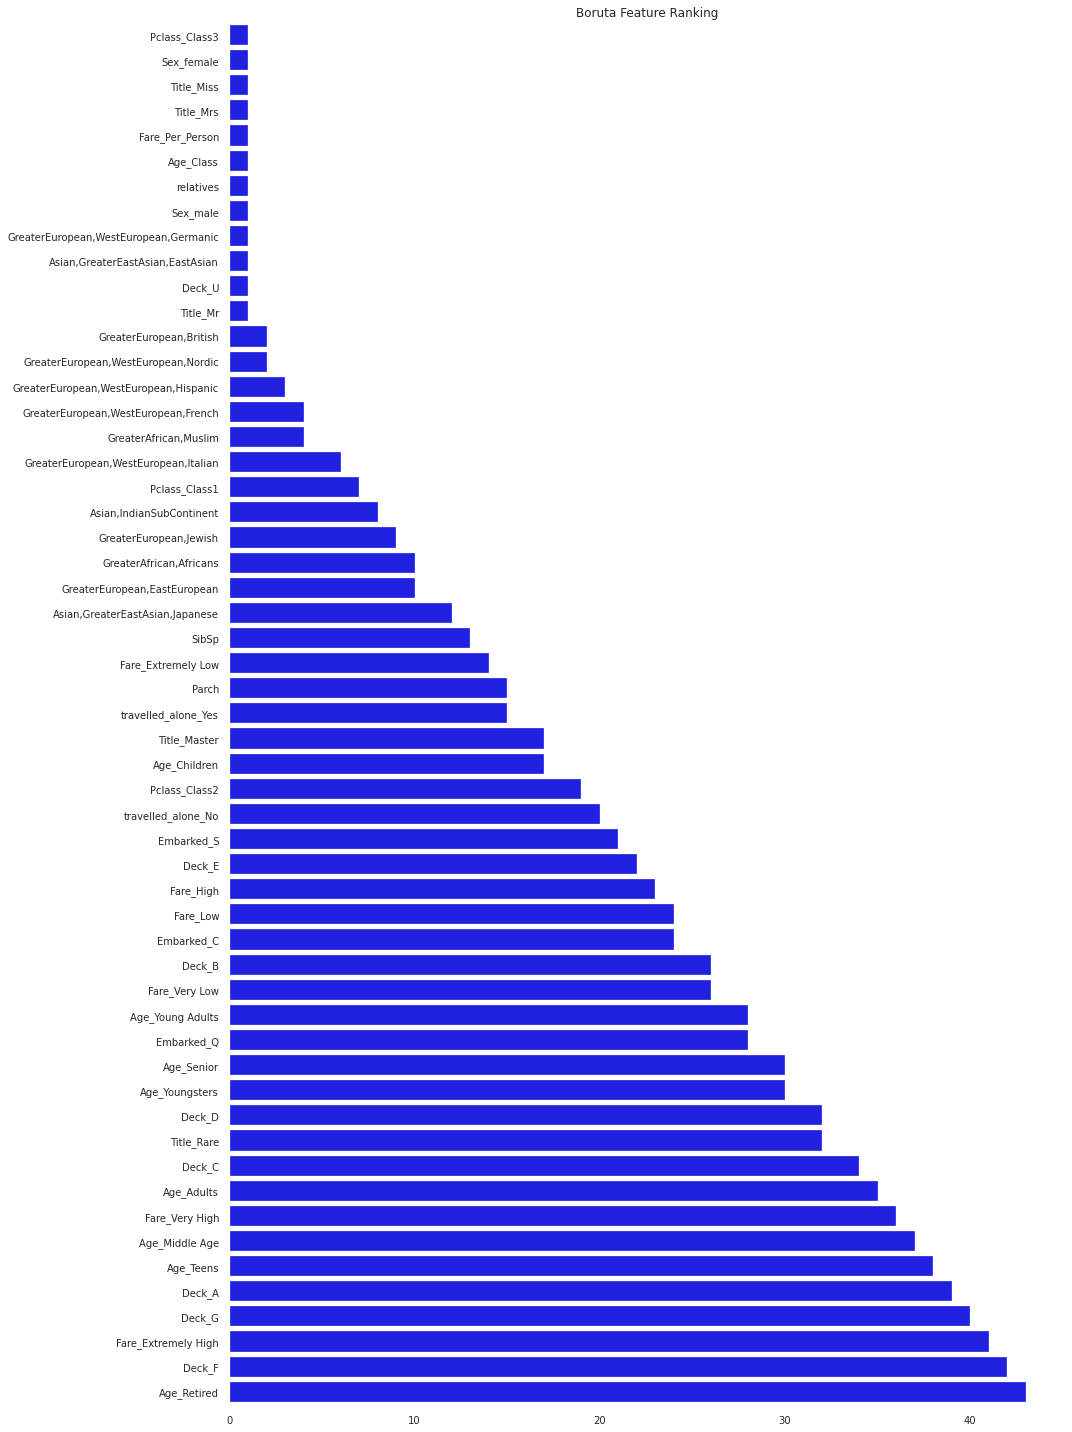

In [247]:
fig,ax = plt.subplots(figsize=(15,20))
ax = sns.barplot(x='values',y='Variable',data=boruta_ranking, color='b')
plt.title('Boruta Feature Ranking')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

selected_features = ['SibSp', 'Parch',
                    'Asian,GreaterEastAsian,EastAsian',
                    'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
                    'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
                    'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
                    'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
                    'GreaterEuropean,WestEuropean,Germanic',
                    'GreaterEuropean,WestEuropean,Hispanic',
                    'GreaterEuropean,WestEuropean,Italian',
                    'GreaterEuropean,WestEuropean,Nordic', 
                    'relatives', 
                    'Age_Class',
                    'Fare_Per_Person',
                    'Sex_female', 
                    'Pclass_Class2', 
                    'Pclass_Class3', 
                    'Deck_E', 'Deck_U',
                    'Title_Mr', 
                    'Title_Rare' 
                    ]

In [248]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [249]:
# Save full dataset for later

X_train_1 = X_train
y_train_1 = y_train
X_test_1 = X_test

In [250]:
# Features
X = X_train 

# Target variable
y = y_train 

# Train Test Split

In [251]:
# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #, stratify=y)

# Model Building

In [252]:
# Classify using a Random Forrest (RF)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

RF = RandomForestClassifier(class_weight = 'balanced', 
                            random_state = 42)
RF.fit(X_train,y_train)

y_pred=RF.predict(X_test)
RF_acc = metrics.accuracy_score(y_test, y_pred)
RF_f1 = f1_score(y_test,y_pred)
RF_precision = precision_score(y_test, y_pred, average='binary')
RF_recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:",RF_acc)
print("F1:",RF_f1)
print('Precision: %.3f' % RF_precision)
print('Recall: %.3f' % RF_recall)

Accuracy: 0.8135593220338984
F1: 0.744186046511628
Precision: 0.842
Recall: 0.667


In [253]:
# Classify using Naive Bayes (NB)

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB_acc = metrics.accuracy_score(y_test, y_pred)
GNB_f1 = f1_score(y_test,y_pred)
GNB_precision = precision_score(y_test, y_pred, average='binary')
GNB_recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:",GNB_acc)
print("F1:",GNB_f1)
print('Precision: %.3f' % GNB_precision)
print('Recall: %.3f' % GNB_recall)

Accuracy: 0.7423728813559322
F1: 0.6885245901639343
Precision: 0.677
Recall: 0.700


In [254]:
# Classify using Logisitic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(class_weight = 'balanced', 
    random_state = 42)
LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)
LogReg_acc = metrics.accuracy_score(y_test, y_pred)
LogReg_f1 = f1_score(y_test,y_pred)
LogReg_precision = precision_score(y_test, y_pred, average='binary')
LogReg_recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:",LogReg_acc)
print("F1:",LogReg_f1)
print('Precision: %.3f' % LogReg_precision)
print('Recall: %.3f' % LogReg_recall)

Accuracy: 0.8169491525423729
F1: 0.7804878048780488
Precision: 0.762
Recall: 0.800


In [255]:
# Classify using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDA = LDA(n_components=1)
LDA.fit(X_train, y_train)

y_pred=LDA.predict(X_test)
LDA_acc = metrics.accuracy_score(y_test, y_pred)
LDA_f1 = f1_score(y_test,y_pred)
LDA_precision = precision_score(y_test, y_pred, average='binary')
LDA_recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:",LDA_acc)
print("F1:",LDA_f1)
print('Precision: %.3f' % LDA_precision)
print('Recall: %.3f' % LDA_recall)

Accuracy: 0.8305084745762712
F1: 0.7844827586206896
Precision: 0.812
Recall: 0.758


In [256]:
# Classify using XG Boost (XGB)
from xgboost import XGBClassifier

XGB = XGBClassifier('binary:logistic',
                    booster= 'gbtree', random_state = 42)
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
XGB_acc = metrics.accuracy_score(y_test, y_pred)
XGB_f1 = f1_score(y_test,y_pred)
XGB_precision = precision_score(y_test, y_pred, average='binary')
XGB_recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:",XGB_acc)
print("F1:",XGB_f1)
print('Precision: %.3f' % XGB_precision)
print('Recall: %.3f' % XGB_recall)

Accuracy: 0.8135593220338984
F1: 0.7555555555555556
Precision: 0.810
Recall: 0.708


In [257]:
from sklearn.ensemble import VotingClassifier

Vote_Clf = VotingClassifier(estimators=[
          ('logr',LogReg), 
    #('xgb',XGB),
    ('lda', LDA),
   # ('rf', RF), 
], voting='soft')
Vote_CLF = Vote_Clf.fit(X_train, y_train)
y_pred = Vote_Clf.predict(X_test)
vote_acc = metrics.accuracy_score(y_test, y_pred)
vote_f1 = f1_score(y_test,y_pred)
vote_precision = precision_score(y_test, y_pred, average='binary')
vote_recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:",vote_acc)
print("F1:",vote_f1)
print('Precision: %.3f' % vote_precision)
print('Recall: %.3f' % vote_recall)

Accuracy: 0.8169491525423729
F1: 0.7711864406779662
Precision: 0.784
Recall: 0.758


In [258]:
Vote_Clf1 = VotingClassifier(estimators=[
          ('logr',LogReg), 
   # ('xgb',XGB), 
    ('lda', LDA),
    #('rf', RF),
], voting='hard')
Vote_CLF1 = Vote_Clf1.fit(X_train, y_train)
y_pred = Vote_Clf1.predict(X_test)
vote_1_acc = metrics.accuracy_score(y_test, y_pred)
vote_1_f1 = f1_score(y_test,y_pred)
vote_1_precision = precision_score(y_test, y_pred, average='binary')
vote_1_recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:",vote_1_acc)
print("F1:",vote_1_f1)
print('Precision: %.3f' % vote_1_precision)
print('Recall: %.3f' % vote_1_recall)

Accuracy: 0.8305084745762712
F1: 0.7844827586206896
Precision: 0.812
Recall: 0.758


# Model accuracy comparison on train/test split

In [259]:
models = pd.DataFrame({
    'Model': ['Voting Classifier (soft)', 'Voting Classifier (hard)','Logistic Regression', 
              'Random Forest', 'Naive Bayes','XGBoost', 'LDA'],
    'Score': [vote_acc, vote_1_acc, LogReg_acc, RF_acc, GNB_acc, 
              XGB_acc, LDA_acc],
    'Precision': [vote_precision, vote_1_precision, LogReg_precision, RF_precision, GNB_precision, 
              XGB_precision, LDA_precision],
    'Recall': [vote_recall, vote_1_recall, LogReg_recall, RF_recall, GNB_recall, 
              XGB_recall, LDA_recall],
    'F1': [vote_f1, vote_1_f1, LogReg_f1, RF_f1, GNB_f1, 
              XGB_f1, LDA_f1]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Precision,Recall,F1
1,Voting Classifier (hard),0.830508,0.812500,0.758333,0.784483
6,LDA,0.830508,0.812500,0.758333,0.784483
0,Voting Classifier (soft),0.816949,0.784483,0.758333,0.771186
2,Logistic Regression,0.816949,0.761905,0.800000,0.780488
3,Random Forest,0.813559,0.842105,0.666667,0.744186
5,XGBoost,0.813559,0.809524,0.708333,0.755556
4,Naive Bayes,0.742373,0.677419,0.700000,0.688525


# Cross Validation on full dataset

In [260]:
from sklearn.model_selection import cross_val_score
RF1 = RandomForestClassifier(random_state = 42) #,class_weight = 'balanced')

#RF1 = RandomForestClassifier(n_estimators = 800, random_state=42)
classifiers = [RF, RF1, Vote_Clf,Vote_Clf1,LogReg,XGB,LDA]
classifier_names = ['RF', 'RF1', 'Vote Clf (soft)','Vote_Clf (hard)','LogReg','XGB','LDA']

n = 0
for i in classifiers:
    
    scores = cross_val_score(i, X_train_1, y_train_1, cv=5)
    print(classifier_names[n],": ","%0.2f accuracy, %0.2f median, with a standard deviation of %0.2f" % (scores.mean(), np.median(scores), scores.std()))
    n+=1

RF :  0.82 accuracy, 0.80 median, with a standard deviation of 0.03
RF1 :  0.82 accuracy, 0.81 median, with a standard deviation of 0.03
Vote Clf (soft) :  0.80 accuracy, 0.80 median, with a standard deviation of 0.02
Vote_Clf (hard) :  0.81 accuracy, 0.81 median, with a standard deviation of 0.01
LogReg :  0.81 accuracy, 0.81 median, with a standard deviation of 0.02
XGB :  0.81 accuracy, 0.81 median, with a standard deviation of 0.02
LDA :  0.81 accuracy, 0.80 median, with a standard deviation of 0.02


# Cross-Validation

In [261]:
from sklearn.model_selection import cross_val_score
RF1 = RandomForestClassifier(random_state = 42) #,class_weight = 'balanced')

#RF1 = RandomForestClassifier(n_estimators = 800, random_state=42)
classifiers = [RF, RF1, Vote_Clf,Vote_Clf1,LogReg,XGB,LDA]
classifier_names = ['RF', 'RF1', 'Vote Clf (soft)','Vote_Clf (hard)','LogReg','XGB','LDA']

n = 0
for i in classifiers:
    
    scores = cross_val_score(i, X_train_1, y_train_1, cv=3)
    print(classifier_names[n],": ","%0.2f accuracy, %0.2f median, with a standard deviation of %0.2f" % (scores.mean(), np.median(scores), scores.std()))
    n+=1

RF :  0.82 accuracy, 0.82 median, with a standard deviation of 0.02
RF1 :  0.82 accuracy, 0.82 median, with a standard deviation of 0.01
Vote Clf (soft) :  0.81 accuracy, 0.80 median, with a standard deviation of 0.02
Vote_Clf (hard) :  0.81 accuracy, 0.80 median, with a standard deviation of 0.01
LogReg :  0.80 accuracy, 0.80 median, with a standard deviation of 0.02
XGB :  0.81 accuracy, 0.81 median, with a standard deviation of 0.01
LDA :  0.81 accuracy, 0.80 median, with a standard deviation of 0.01


# Train Model on full dataset and submit predictions

In [262]:
model = Vote_Clf1.fit(X_train_1,y_train_1)
submission_preds = model.predict(X_test_1)

submission_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [263]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": submission_preds
    })
submission.to_csv('submission.csv', index=False)

In [264]:
#        TO 
#                BE 
#                        CONTINUED......